## Esame Metodi Numerici  4 Luglio 2024 - Turno I Ore 9

# Esercizio 1

Si consideri il sistema lineare:

     A  x = b 

dove A è la matrice dei coefficienti, b è il termine noto, ed x è il vettore delle incognite da determinare.
I dati di questo sistema lineare sono contenuti nel file **testI.mat**.

- Si implementino e si testino sui dati forniti due metodi che sono adatti a risolvere tale sistema lineare con le caratteristiche delle matrici dei coefficienti date in input.
                                      **[punti 7]**
- Si confrontino i risultati ottenuti e si giustifichino utilizzando  e richiamando gli aspetti teorici dei metodi implementati.
                                      **[punti 2]**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

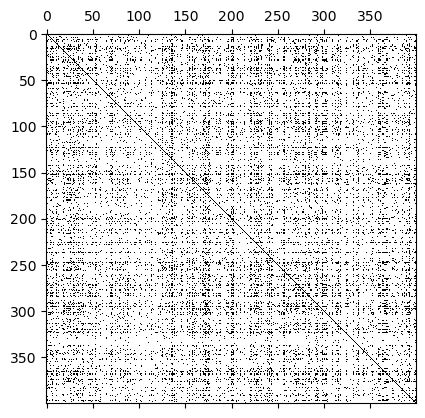

Condizionamento di A =  398.0942877444191
A diagonalmente dominante =  True
A simmetrica =  False
A definita positiva =  True
raggio spettrale jacobi 0.48209261553629906
raggio spettrale Gauss-Seidel  0.2889737780164917
raggio spettrale Gauss-Seidel SOR  0.3577411717035056


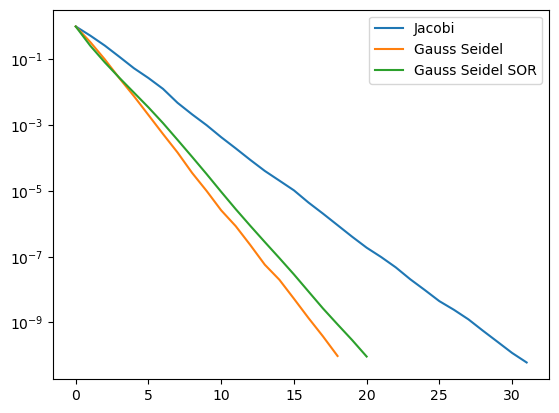

In [20]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import sympy as sym
import numpy.linalg as npl
import scipy.linalg as spl
import numpy as np
import sys, os
sys.path.append(os.path.abspath('../Scheletri'))

import Schel_FULL as sf

dati = loadmat('testI')
A=dati["A"] 
A=A.astype(float)
b=dati["b"] 
b=b.astype(float)

def is_symmetric(A):
    return np.allclose(A, A.T)

def is_def_pos(A):
    return np.all(npl.eigvals(A) > 0)

def is_diag_dominant(A):
    for i in range(A.shape[0]):
        if A[i, i] <= (np.sum(np.abs(A[i, :])) - abs(A[i,i])):
            return False
    return True

plt.spy(A)
plt.show()
print("Condizionamento di A = ", npl.cond(A))
print("A diagonalmente dominante = ", is_diag_dominant(A))
print("A simmetrica = ", is_symmetric(A))
print("A definita positiva = ", is_def_pos(A))

#uso jacobi, gs, e gssor

toll = 1e-10
x0 = np.zeros(A.shape[0]).reshape(A.shape[0], 1)
maxit = 1000

sol_JC, numit_JC, err_vec_JC = sf.jacobi(A, b, x0, toll, maxit)
sol_GS, numit_GS, err_vec_GS = sf.gauss_seidel(A, b, x0, toll, maxit)
sol_GSSOR, numit_GSSOR, err_vec_GSSOR = sf.gauss_seidel_sor(A, b, x0, toll, maxit, 0.9)

plt.semilogy(range(numit_JC), err_vec_JC, label = "Jacobi")
plt.semilogy(range(numit_GS), err_vec_GS, label = "Gauss Seidel")
plt.semilogy(range(numit_GSSOR), err_vec_GSSOR, label = "Gauss Seidel SOR")
plt.legend()
plt.show()




## Esercizio 2

-  Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare
                           [**punti: 7**]

- Risolvere il sistema di equazioni non lineare 

$$
\left\{
\begin{array}{c}
x_0\cdot x_1+x_0=1 \\
 x_0^2+x_1^2=9
\end{array}
\right.
$$
con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria. [**punti: 3**]

 **Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X^{(0)}$ nell'intorno della soluzione che si vuole approssimare.  Per fare cio',  visualizzare le 
curve di livello corrisponenti a z=0 delle due superfici $z_1 = f_1 (x_0 ,x_1 )$ e $z_2 = f_2(x_0 , x_1 )$ e 
definire come iterato iniziale un vettore $X^{(0)}=(x_0^{(0)},x_1^{(0)})$ oppurtuno le cui componenti appartengono ad un 
intorno della soluzione (cioè  dei punti di  intersezione tra le curve di livello delle due superfici) \]

- Descrivere teoricamente la variante del Metodo di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili.

 [**punti: 2**]
 



⎡x⋅y + x - 1⎤
⎢           ⎥
⎢ 2    2    ⎥
⎣x  + y  - 9⎦
⎡y + 1   x ⎤
⎢          ⎥
⎣ 2⋅x   2⋅y⎦
[[2 1]
 [2 2]]
[ 5 -1]


Text(0.5, 0, 'Z')

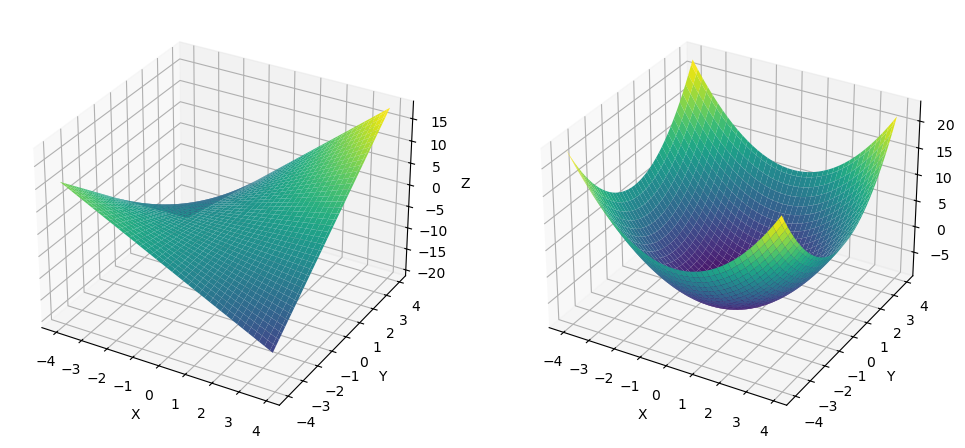

In [35]:
x, y = sym.symbols('x y')

A = sym.Matrix([[x*y + x -1],
               [x**2 + y**2 -9]])


fun1_sym = A[0]
fun2_sym = A[1]
fun1 = sym.lambdify((x,y), fun1_sym, np)
fun2 = sym.lambdify((x,y), fun2_sym, np)

xx = np.arange(-4, 4, 0.1)
yy = np.arange(-4, 4, 0.1)

X, Y = np.meshgrid(xx, yy)




jac_sym = A.jacobian((x,y))
jac_2args = sym.lambdify((x,y), jac_sym, np)
jac = lambda arg : np.array(jac_2args(*arg))


F_2args = sym.lambdify((x, y), A, np)
F = lambda x : np.array(F_2args(*x)).flatten()


sym.pretty_print(A)
sym.pretty_print(jac_sym)
print(jac((1, 1)))
print(F((2, 2)))


fig, ax = plt.subplots(1, 2, subplot_kw = {'projection' : '3d'}, figsize = (12, 6))

Z1 = fun1(X, Y)
ax[0].plot_surface(X, Y, Z1, cmap='viridis')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_zlabel('Z')

Z2 = fun2(X, Y)
ax[1].plot_surface(X, Y, Z2, cmap='viridis')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_zlabel('Z')









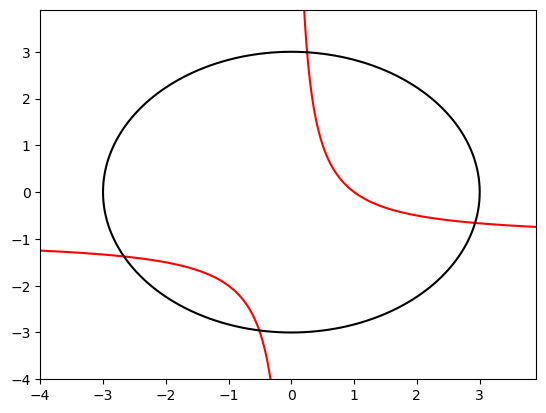

In [37]:
plt.contour(X, Y, Z1, levels = [0], colors = 'red')
plt.contour(X, Y, Z2, levels = [0], colors = 'black')
plt.show()

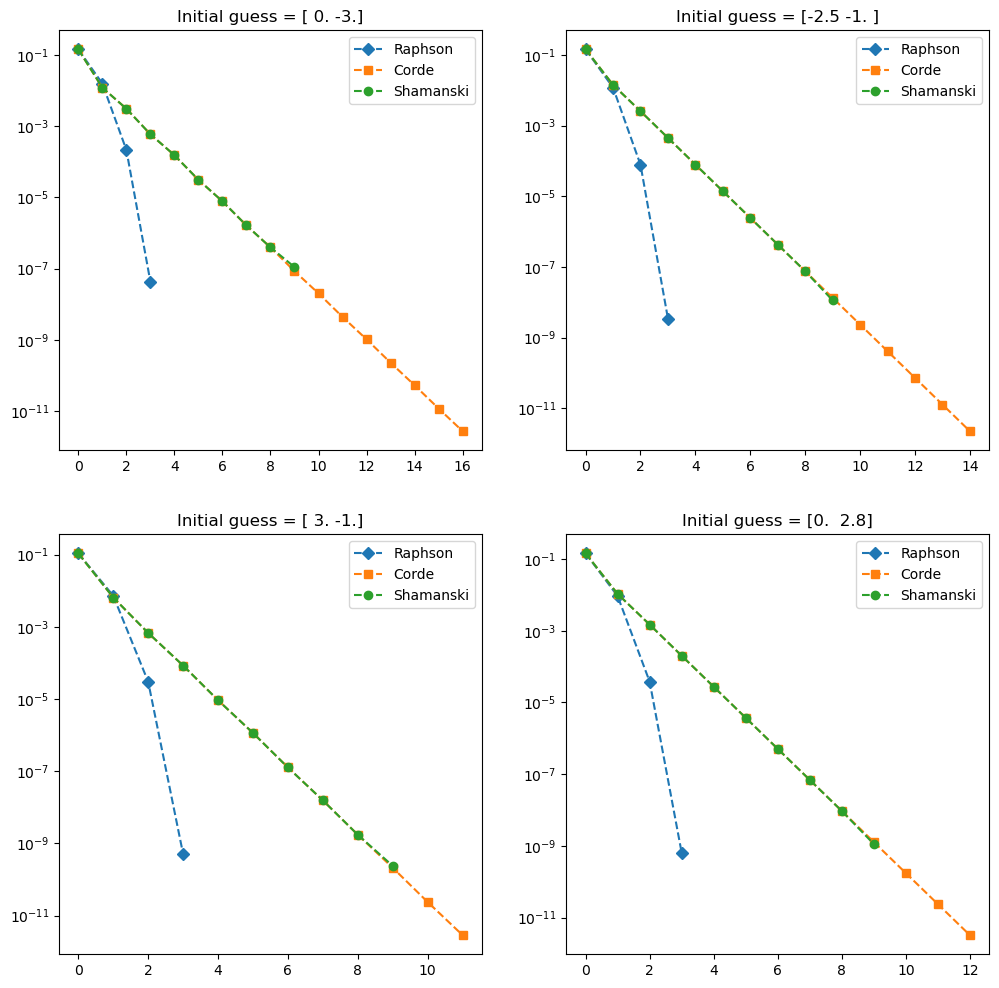

In [42]:
tolx, tolf = (1e-11, 1e-11)
maxit = 1000

x0s = np.array([[0, -3], [-2.5, -1], [3, -1], [0, 2.8]])
zeros = []

fig, ax = plt.subplots(2, 2, figsize = (12, 12))
ax = ax.flatten()

for i, guess in enumerate(x0s):
    sol, numit, err_rel = sf.my_newtonSys(F, jac,  x0s[i], tolx, tolf, maxit)
    sol_C, numit_C, err_rel_C = sf.my_newtonSys_corde(F, jac,  x0s[i], tolx, tolf, maxit)
    sol_S, numit_S, err_rel_S = sf.my_newtonSys_sham(F, jac,  x0s[i], tolx, tolf, maxit)

    zeros.append(sol_S)
    ax[i].set_title(f"Initial guess = {guess}")
    ax[i].semilogy(range(numit), err_rel,'D--', label = 'Raphson')
    ax[i].semilogy(range(numit_C), err_rel_C, 's--',label = 'Corde')
    ax[i].semilogy(range(numit_S), err_rel_S,'o--', label = 'Shamanski')
    ax[i].legend()







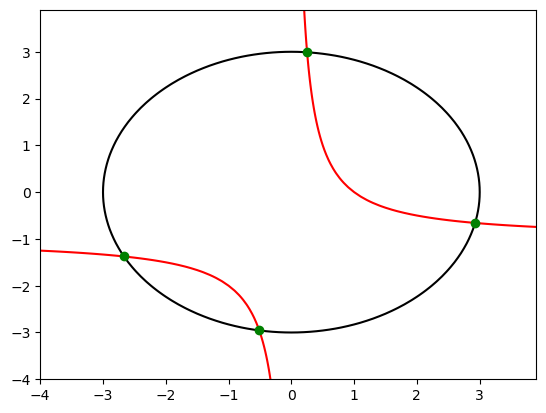

In [43]:
plt.contour(X, Y, Z1, levels = [0], colors = 'red')
plt.contour(X, Y, Z2, levels = [0], colors = 'black')
for zero in zeros:
    plt.plot(zero[0], zero[1], 'go')
plt.show()

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

Domande a risposta multipla

**1.** Quali sono i passaggi fondamentali all’interno del paradigma generale dell’Intelligenza Artificiale?

•	Acquisizione dati, Data Processing, Addestramento del modello, Predizione e metriche $\impliedby$

•	Data Processing, Addestramento del Modello, Predizione, Analisi economica dei risultati

•	Acquisizione dati, Data Processing, Addestramento del modello, Predizione, Test di Turing

•	Acquisizione dati, Addestramento del Modello, Test di Turing, Predizione


**2.** Per una rete neurale, l’apprendimento è legato a:

•	Minimizzare la funzione obiettivo $\impliedby$

•	Minimizzare la funzione di attivazione

•	Massimizzare il valore dei pesi tramite l’algoritmo di back-propagation

•	Massimizzare il valore della funzione di training


**3.**  Il Test di Turing serve a:

•	Valutare se una macchina dimostra un comportamento intelligente $\impliedby$

•	Valutare il carico computazionale di un algoritmo di Intelligenza Artificiale

•	Valutare la velocità di risposta di un algoritmo di Intelligenza Artificiale

•	Valutare se una macchina dimostra un comportamento predicibile


**4.**
Le ultime e più recenti innovazioni nel campo dell’Intelligenza Artificiale sono:

•	CNN, GAN e Transformers $\impliedby$

•	Expert Systems, CNN e GAN

•	Expert Systems, Deep Learning e CNN

•	CNN, Expert Systems e Transformers


**5.** A cosa serve il validation set?

•	A trovare i migliori iperparametri del modello $\impliedby$

•	Ad addestrare il modello 

•	A testare il modello

•	A trovare le etichette dei dati di input


**Domande aperte**

Quale è il ruolo del learning rate nella formula di aggiornamento dei pesi mediante gradient descent. Aggiornamento del learning rate programmato (learning rate scheduling) : step decay, decadimento esponenziale, decadimento dipendente dal tempo. **[punti 2]**

Il **learning rate** (tasso di apprendimento) è un iperparametro che controlla di quanto vengono aggiornati i pesi del modello durante il processo di ottimizzazione mediante **gradient descent**. Nella formula di aggiornamento dei pesi:

$$
w_{\text{nuovo}} = w_{\text{vecchio}} - \eta \cdot \nabla J(w)
$$

dove:
-  $w$ sono i pesi del modello,
-  $\eta$ è il learning rate,
-  $\nabla J(w)$ è il gradiente della funzione di costo  $J$ rispetto ai pesi.

Il learning rate determina la dimensione del passo con cui i pesi vengono aggiornati. Se il valore di  $\eta$ è troppo piccolo, la convergenza sarà lenta, mentre se è troppo grande, potrebbe causare oscillazioni o divergenza.

### Aggiornamento del learning rate programmato (**Learning Rate Scheduling**)
Per migliorare l'efficienza della discesa del gradiente, il learning rate può essere adattato durante l'allenamento. Alcuni approcci comuni per l'aggiornamento programmato del learning rate sono:

1. **Step Decay**:
   Il learning rate viene ridotto di un fattore fisso dopo un numero predefinito di epoche. La formula è:
   $$
   \eta(t) = \eta_0 \cdot \text{drop}^{\left\lfloor \frac{t}{\text{step\_size}} \right\rfloor}
   $$
   dove:
   -  $\eta_0$ è il learning rate iniziale,
   -  $t$ è il numero di epoche,
   - `drop` è il fattore di riduzione,
   - `step_size` è l'intervallo di epoche dopo il quale il learning rate viene ridotto.

2. **Decadimento esponenziale**:
   Il learning rate viene ridotto in modo esponenziale man mano che l'allenamento procede. La formula è:
   $$
   \eta(t) = \eta_0 \cdot e^{-\lambda t}
   $$
   dove:
   -  $\lambda$ è il tasso di decadimento,
   -  $t$ è il numero di epoche.

3. **Decadimento dipendente dal tempo**:
   Il learning rate diminuisce nel tempo in modo inversamente proporzionale al numero di epoche:
   $$
   \eta(t) = \frac{\eta_0}{1 + \lambda t}
   $$
   dove  $\lambda$ è una costante che determina la velocità di decadimento.

Queste tecniche permettono di ridurre il learning rate in maniera controllata, migliorando la stabilità dell'ottimizzazione e favorendo una convergenza più efficiente verso un minimo locale della funzione di costo.


Learning rate adattivo per ogni peso (durante il processo di ottimizzazione) : Adagrad, RMSProp, Adadelta, Adam. (formula di aggiornamento dei pesi e discussioni)
**[punti 2.5]**

### Adagrad

$$
s^{(k)} = s^{(k-1)}+ (\nabla C (w^{(k)}))^2
$$

$$
w^{(k+1)} = w^{(k)}- \frac{\eta}{\sqrt{s^{(k)} + \epsilon}} \nabla C (w^{(k)})
$$

### RMSProp

$$
s^{(k)} = \gamma s^{(k-1)}+ (1 - \gamma)(\nabla C (w^{(k)}))^2
$$

$$
w^{(k+1)} = w^{(k)}- \frac{\eta}{\sqrt{s^{(k)} + \epsilon}} \nabla C (w^{(k)})
$$

### Adadelta

$$
s^{(k)} = \gamma s^{(k-1)}+ (1 - \gamma)(\nabla C (w^{(k)}))^2
$$

$$
\breve{\nabla} C (w^{(k)}) = \frac{\sqrt{ \Delta w^{(k-1)} + \epsilon}}{\sqrt{s^{(k)} + \epsilon}} \nabla C (w^{(k)})
$$

$$
w^{(k+1)} = w^{(k)}- \breve{\nabla} C (w^{(k)})
$$

### Adam

$$
v^{(k)} =  \beta_1 v^{(k-1)} + (1 - \beta_1) \nabla C (w^{(k)})
$$

$$
s^{(k)} =  \beta_2 s^{(k-1)} + (1 - \beta_2) \left( \nabla C (w^{(k)}) \right)^2
$$

$$
\hat{v}^{(k)} = \frac{v^{(k)}}{1 - \beta_1^{(k)}}
$$

$$
\hat{s}^{(k)} = \frac{s^{(k)}}{1 - \beta_2^{(k)}}
$$

$$
w^{(k+1)} = w^{(k)} - \frac{\eta}{\sqrt{\hat{s}^{(k)}} + \epsilon}\hat{v}^{(k)}
$$



